# Prediction of CHD Risk in ten years time
---

The objective of this project is to build a model which predicts if a patient is in risk of a coronary disease in the next ten years base on prevailing data available. The variables in the data set into three categories. **Before mentioning the variables in the data set, it is necessary to first understand the business problem and have an idea.**

---
## What causes coronary disease?

Coronary arterys is the general name of the arteries that feed the heart. When the heart pumps blood to the aorta (the main artery that feeds the whole body), it first feeds itself through the coronary arteries. Coronary artery disease is a condition that occurs as a result of the narrowing and / or occlusion of the coronary vessels feeding the heart, resulting in the deterioration of the nutrition of the heart muscle. It consists of 3 main coronary vessels feeding the heart and the side vessels branching from them. The main coronary vessels supplying the heart are the left anterior descending artery, the left circumflex artery, and the right coronary arteries.

---
## Causes of coronary heart disease (CHD)?

Coronary heart disease is the term that describes what happens when your heart's blood supply is blocked or interrupted by a build-up of fatty substances in the coronary arteries.

Atherosclerosis can be caused by lifestyle factors, such as smoking and regularly drinking excessive amounts of alcohol.

You're also more at risk of getting coronary if you have conditions like high cholesterol, high blood pressure (hypertension) or diabetes.

---
[Click to Access the Data Set](https://www.kaggle.com/datasets/jiantay33/coronary-prediction)
---

---

## The variables in the data set into three categories
----

## Demographics information about patient
---
* **male :** Gender of patient - 0 = Famle, 1 = Male 

* **age :** Age of patient

* **education :** Education level of patient in ordinal data

## Tobacco usage of patient
---

* **currentSmoker :** information about a patient if he/she is a smoker

* **cigsPerDay :** Amount of consumption if patient is a smoker

## Health information of patient

* **BPMeds :** If a patient is taking BP

* **prevalentStroke :** Status of stroke occurance

* **prevalentHyp :** Status of prevailing hyper tension

* **diabetes :** Status of diabetes

* **totChol :** Cholestrol level

* **sysBP :** Blood pressure level

* **diaBP :** Diastolic blood pressure

* **sysBP :** Systolic blood pressure

* **BMI :** Body mass Index

* **heartRate :** Heart rate reading

* **gluscose :** Glucose level

* **TenYearCHD :** status if will suffer a risk of coronary disease in next ten years

---

## Project :

In [94]:
# Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


# Sklearn Libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score


# To remove alerts

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

## Data loading
**Reading Dataset :**

In [95]:
df = pd.read_csv('coronary_prediction.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


---
<h1><center>Exploratory Data Analysis; EDA</center></h1>

 
---

In [96]:
df.shape

(4238, 16)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [98]:
# Descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0


---

# Types Of Features
---
### Nominal Features :

A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as **Nominal Variables.**

**Nominal variables in the dataset :** male, currentSmoker, BPMeds, prevalentStroke, diabetes, prevalentHyp
 
---
### Ordinal Features :

An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like Height with values Tall, Medium, Short, then Height **is a ordinal variable.** Here we can have a relative sort in the variable.

**Ordinal variables in the dataset :** education

---
### Continous Features :

A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

**Continous variables in the dataset :** age, totChol, glucose, heartRate, BMI, diaBP, sysBP, cigsPerDay

---
### Target Variable :

The target variable of a dataset is the feature of a dataset about which you want to gain a deeper understanding. A supervised machine learning algorithm uses historical data to learn patterns and uncover relationships between other features of your dataset and the target.


**Target variable in the dataset :** TenYearCHD

---

# Analysing The Features
---

In [99]:
# Continous Feature ---> Age 

In [100]:
print('Oldest Patient -Female/Male- in Dataset :\n', df.groupby(['male'])[['age']].max())
print('-----------------------------------------------')
print('Youngest Patient -Female/Male- in the Dataset :\n',df.groupby(['male'])[['age']].min())
print('--------------------------------------------------')
print('Average Age of Patients in Dataset - Female/Male :\n', df.groupby(['male'])[['age']].mean())

Oldest Patient -Female/Male- in Dataset :
       age
male     
0      70
1      69
-----------------------------------------------
Youngest Patient -Female/Male- in the Dataset :
       age
male     
0      32
1      33
--------------------------------------------------
Average Age of Patients in Dataset - Female/Male :
             age
male           
0     49.800331
1     49.298516


In [101]:
# Age Distribution Examining

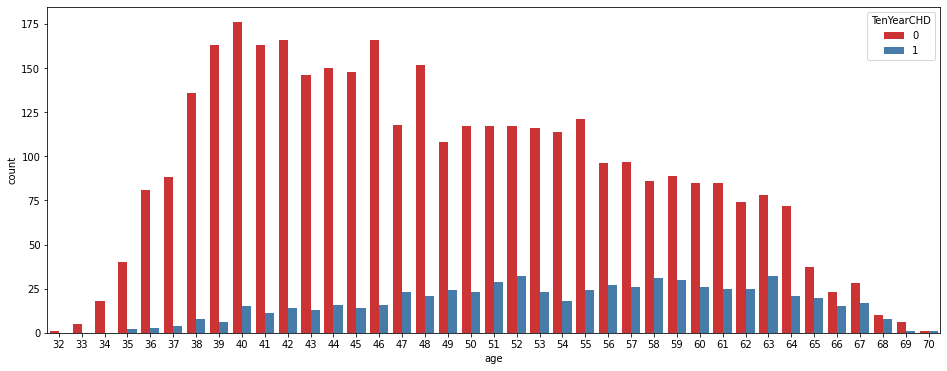

In [102]:
plt.figure(figsize=(16,6))
sns.countplot(x=df['age'],hue=df['TenYearCHD'], palette="Set1");

---
>> **People aged 35 and over are at risk and The risk tend to be higher from the age of 40 onwards. Can be said...**
---

In [103]:
# TenYearCHD Distribution

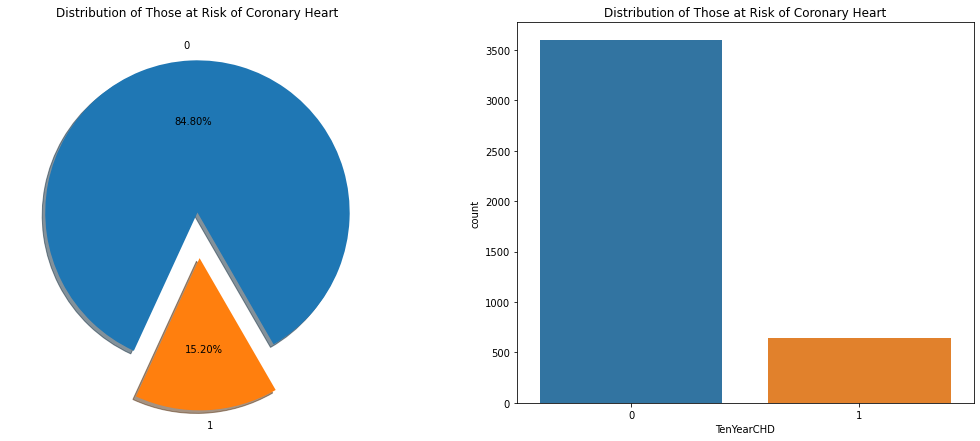

In [104]:
a , ax = plt.subplots(1,2,figsize=(18,7))
df['TenYearCHD'].value_counts().plot.pie(explode=[0,0.3], autopct='%1.2f%%',ax=ax[0],shadow=True, startangle=300)
ax[0].set_title('Distribution of Those at Risk of Coronary Heart')
ax[0].set_ylabel('')
sns.countplot('TenYearCHD', data = df ,ax=ax[1])
ax[1].set_title('Distribution of Those at Risk of Coronary Heart')
plt.show()

In [105]:
df.groupby(['TenYearCHD'])[['TenYearCHD']].count()

,TenYearCHD
TenYearCHD,
0,3594
1,644


In [106]:
# Gender Distribution

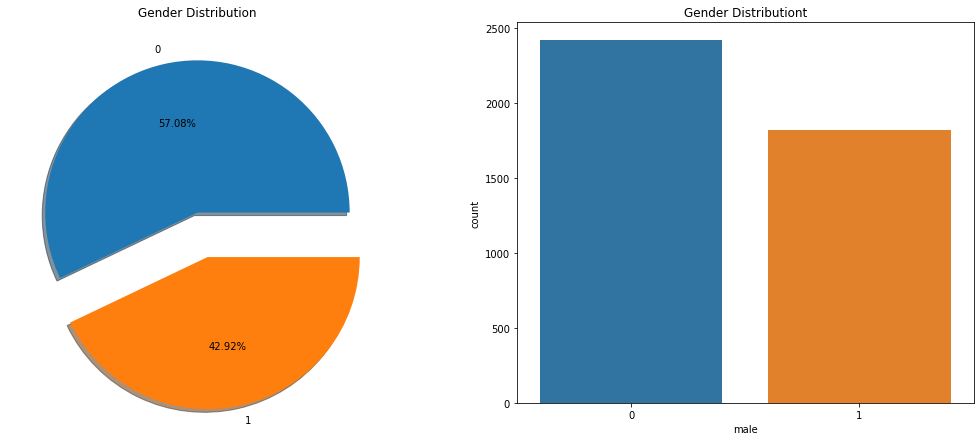

In [107]:
f , ax = plt.subplots(1,2,figsize=(18,7))
df['male'].value_counts().plot.pie(explode=[0,0.3],autopct='%1.2f%%',ax=ax[0],shadow=True)
ax[0].set_title('Gender Distribution')
ax[0].set_ylabel('')
sns.countplot('male', data = df ,ax=ax[1])
ax[1].set_title('Gender Distributiont')
plt.show()

In [108]:
# Gender and TenYearCHD Distribution

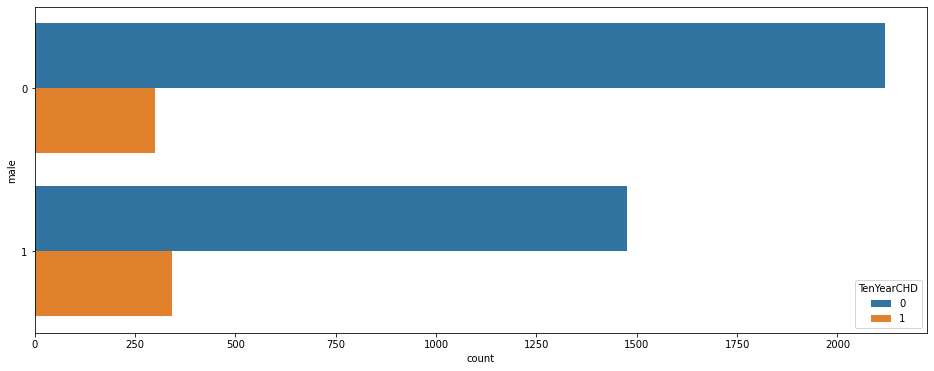

In [109]:
plt.figure(figsize=(16,6))
sns.countplot(y="male", hue="TenYearCHD", data=df);

In [110]:
pd.crosstab(df.TenYearCHD,df.male,margins=True).style.background_gradient(cmap='summer_r')

male,0,1,All
TenYearCHD,,,
0,2118,1476,3594
1,301,343,644
All,2419,1819,4238


---
>> ### When I examined the distribution of those at risk of coronary heart , gender distribution  and their age distribution, I came to the following conclusions :

---
* Out of a total of 4238 observation units, 3594 (ie: %84.8) do not carry the risk of coronary artery disease. The remaining 644 (ie: %15.20) observation units carry the risk of coronary artery disease.
* When examining the gender distribution in the data set; Out of 4238 observation units, the gender of 2419 (ie: %57.08) observation units is 0 (Famle), the remaining 1819 (ie: %42.92) observation units are 1 (Male).
* When the distribution of coronary disease risk by gender is analyzed, 301 of 644 people are women (ie %46.74), and the remaining 343 people (ie %53.26) are men.

**The probability that a man will have CHD Disease: %18.85**
* **formula: (343 x 100)/1819 = 18.95**

**The probability that a women will have CHD Disease: %12.44**
* **formula : (301 x 100)/2419 = 12.44**

---

>> ## In this case, men are %6.51 more at risk than women.
---

In [111]:
# Ordinal Feature --> EDUCATİON

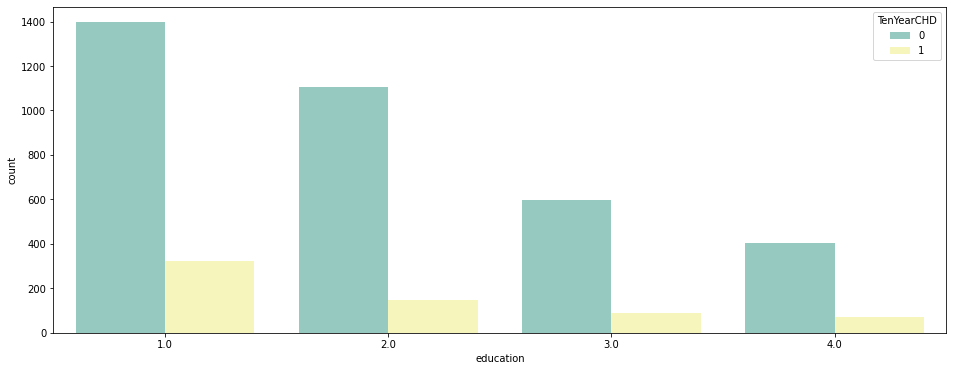

In [112]:
plt.figure(figsize=(16,6))
sns.countplot(x=df['education'],hue=df['TenYearCHD'], palette="Set3");

# About ordinal feature :
---
* By looking at the graph above, it can be said that the risk increases as the class status decreases, but if we do not take any action other than the graph above and are not examined in detail, we will come to an incorrect conclusion. Therefore, I will consider the training feature in more detail ...

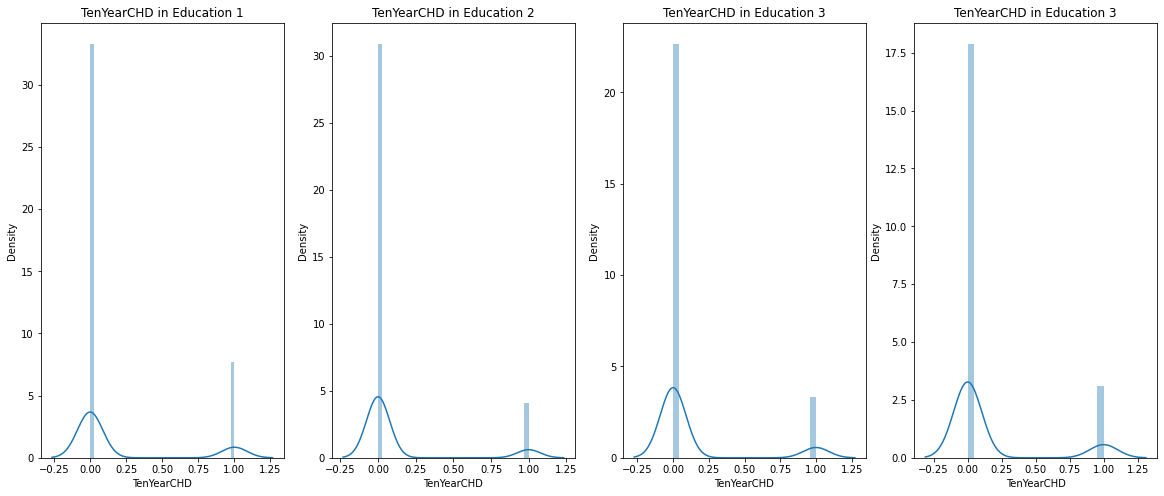

In [113]:
f,ax=plt.subplots(1,4,figsize=(20,8))
sns.distplot(df[df['education']==1].TenYearCHD,ax=ax[0])
ax[0].set_title('TenYearCHD in Education 1')
sns.distplot(df[df['education']==2].TenYearCHD,ax=ax[1])
ax[1].set_title('TenYearCHD in Education 2')
sns.distplot(df[df['education']==3].TenYearCHD,ax=ax[2])
ax[2].set_title('TenYearCHD in Education 3')
sns.distplot(df[df['education']==4].TenYearCHD,ax=ax[3])
ax[3].set_title('TenYearCHD in Education 3')
plt.show()

---
>> **Now when I want to observe it with a different visualization technique, the Risk order is 1,4,3,2 ! (So it cannot be said that the risk increases as the class status decreases, on the contrary, the 1st class has the highest risk ratio, followed by the 4th class, then the 3rd class and the 2nd class.)**
---

In [114]:
# I will get more detailed information for the training feature and calculate the risk ratios
pd.crosstab(df.TenYearCHD,df.education,margins=True).style.background_gradient(cmap='summer_r')

education,1.000000,2.000000,3.000000,4.000000,All
TenYearCHD,,,,,
0,1397,1106,599,403,3505
1,323,147,88,70,628
All,1720,1253,687,473,4133


---
>> **Probability of a person with education category 1 having CHD: %18.85**

>> **Probability of a person with education category 2 having CHD: %11.73**

>> **Probability of a person with education category 3 having CHD: %12.80**

>> **Probability of a person with education category 4 having CHD: %14.79**
---

In [115]:
# Nominal Features ---> currentSmoker, BPMeds, prevalentStroke, diabetes, prevalentHyp  

In [116]:
nominal_features = list(['TenYearCHD','prevalentStroke', 'BPMeds',  'diabetes', 'currentSmoker','prevalentHyp'])

In [117]:
df.groupby(nominal_features)[['TenYearCHD']].count()

TenYearCHD
TenYearCHD prevalentStroke BPMeds diabetes currentSmoker prevalentHyp            
0          0               0.0    0        0             0                   1215
                                                         1                    497
                                           1             0                   1320
                                                         1                    364
                                  1        0             0                     19
                                                         1                     21
                                           1             0                     17
                                                         1                      8
                           1.0    0        0             1                     44
                                           1             1                     30
                                  1        0             1                      3
           1               0.0    0        0             0                      4
                                                         1                      2
                                           1             0                      1
                                                         1                      1
                           1.0    0        0             1                      5
                                           1             1                      1
1          0               0.0    0        0             0                    116
                                                         1                    135
                                           1             0                    184
                                                         1                    116
                                  1        0             0                      8
                                                         1                     12
                                           1             0                      6
                                                         1                      6
                           1.0    0        0             1                     23
                                           1             1                     11
                                  1        0             1                      4
                                           1             1                      2
           1               0.0    0        0             0                      1
                                                         1                      3
                                           1             1                      4
                                  1        0             1                      1
                           1.0    0        0             1                      1

In [118]:
# Visualization process has been applied for better understanding. (As an example, 4 features are discussed.)

In [119]:
pd.crosstab(df.TenYearCHD,df.currentSmoker,margins=True).style.background_gradient(cmap='summer_r')

currentSmoker,0,1,All
TenYearCHD,,,
0,1833,1761,3594
1,311,333,644
All,2144,2094,4238


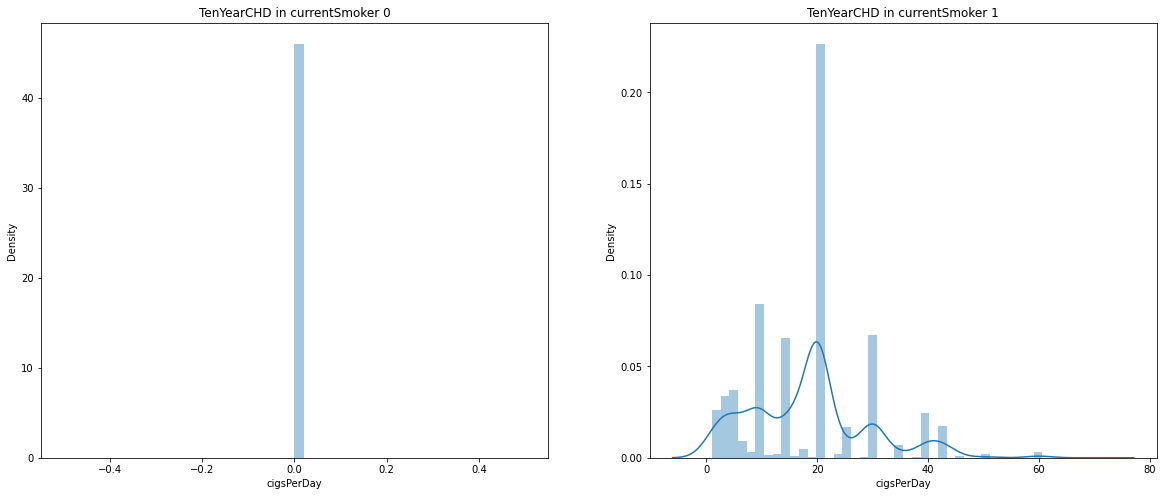

In [120]:
# If she is a CHD patient and smokes, daily consumption information, if she is not a CHD patient, cigarette consumption information
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.distplot(df[df['currentSmoker']==0].cigsPerDay,ax=ax[0])
ax[0].set_title('TenYearCHD in currentSmoker 0')
sns.distplot(df[df['currentSmoker']==1].cigsPerDay,ax=ax[1])
ax[1].set_title('TenYearCHD in currentSmoker 1')
plt.show()

In [121]:
# If smoking is used, daily consumption information (more detailed)
pd.crosstab(df.currentSmoker,df.cigsPerDay,margins=True).style.background_gradient(cmap='summer_r')

cigsPerDay,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000,23.000000,25.000000,29.000000,30.000000,35.000000,38.000000,40.000000,43.000000,45.000000,50.000000,60.000000,70.000000,All
currentSmoker,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2144
1,0,67,18,100,9,121,18,12,11,130,143,5,3,3,2,210,3,7,8,2,734,6,55,1,217,22,1,80,56,3,6,11,1,2065
All,2144,67,18,100,9,121,18,12,11,130,143,5,3,3,2,210,3,7,8,2,734,6,55,1,217,22,1,80,56,3,6,11,1,4209


In [122]:
# average daily consumption of smokers
df[df['currentSmoker'] == 1][['cigsPerDay']].mean().astype('int64')

cigsPerDay    18
dtype: int64

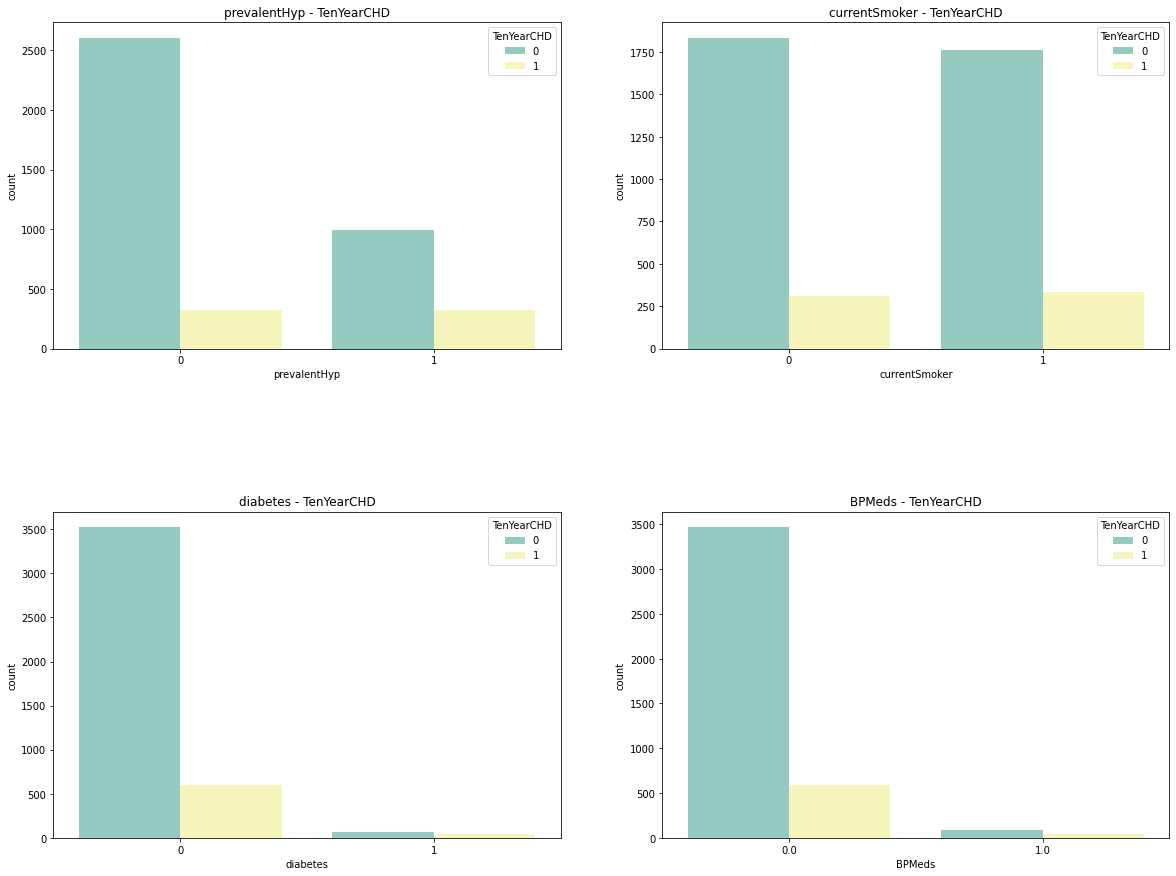

In [123]:
f, ax = plt.subplots(2,2,figsize = (20,15))
sns.countplot('prevalentHyp', hue='TenYearCHD',data=df,ax = ax[0,0], palette="Set3")
ax[0,0].set_title('prevalentHyp - TenYearCHD')
sns.countplot('currentSmoker',hue='TenYearCHD',data=df,ax=ax[0,1], palette="Set3")
ax[0,1].set_title('currentSmoker - TenYearCHD')
sns.countplot('diabetes',hue='TenYearCHD',data=df,ax=ax[1,0], palette="Set3")
ax[1,0].set_title('diabetes - TenYearCHD')
sns.countplot('BPMeds',hue='TenYearCHD',data=df,ax=ax[1,1], palette="Set3")
ax[1,1].set_title('BPMeds - TenYearCHD')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

---
>> **As seen above; It can be said that smokers, users and people with different diseases (prevalence Hyp...) are at higher risk in general.**
---

In [124]:
# Continous Feature --> totChol , glucose , heartRate , BMI , diaBP ,  sysBP 

In [125]:
# I will examine them whether there is a mutual relationship or not.

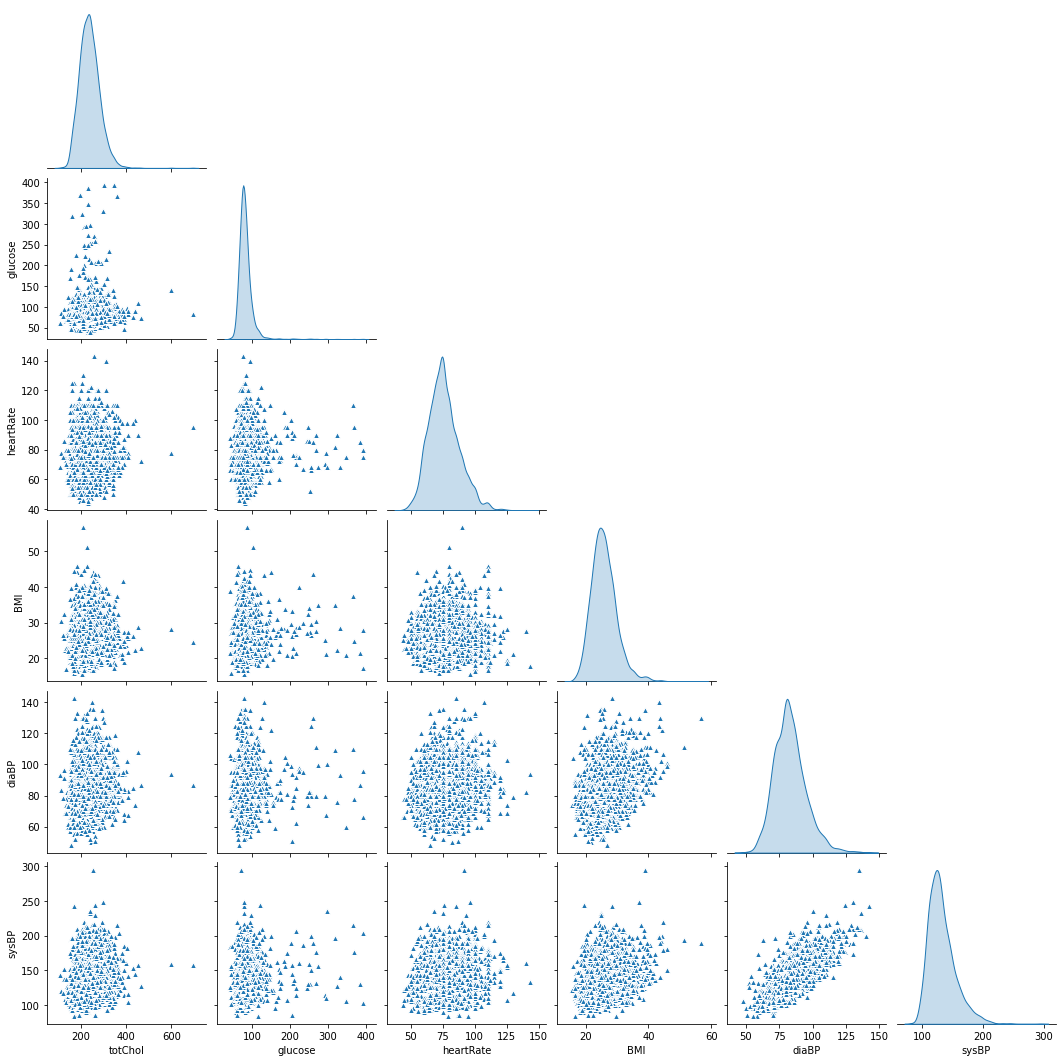

In [126]:
conti_features = ['totChol', 'glucose', 'heartRate', 'BMI', 'diaBP', 'sysBP']
# Set corner = True to draw the bottom triangle only,
sns.pairplot(df[conti_features], corner = True, diag_kind="kde",
            plot_kws=dict(marker="^", linewidth=1));

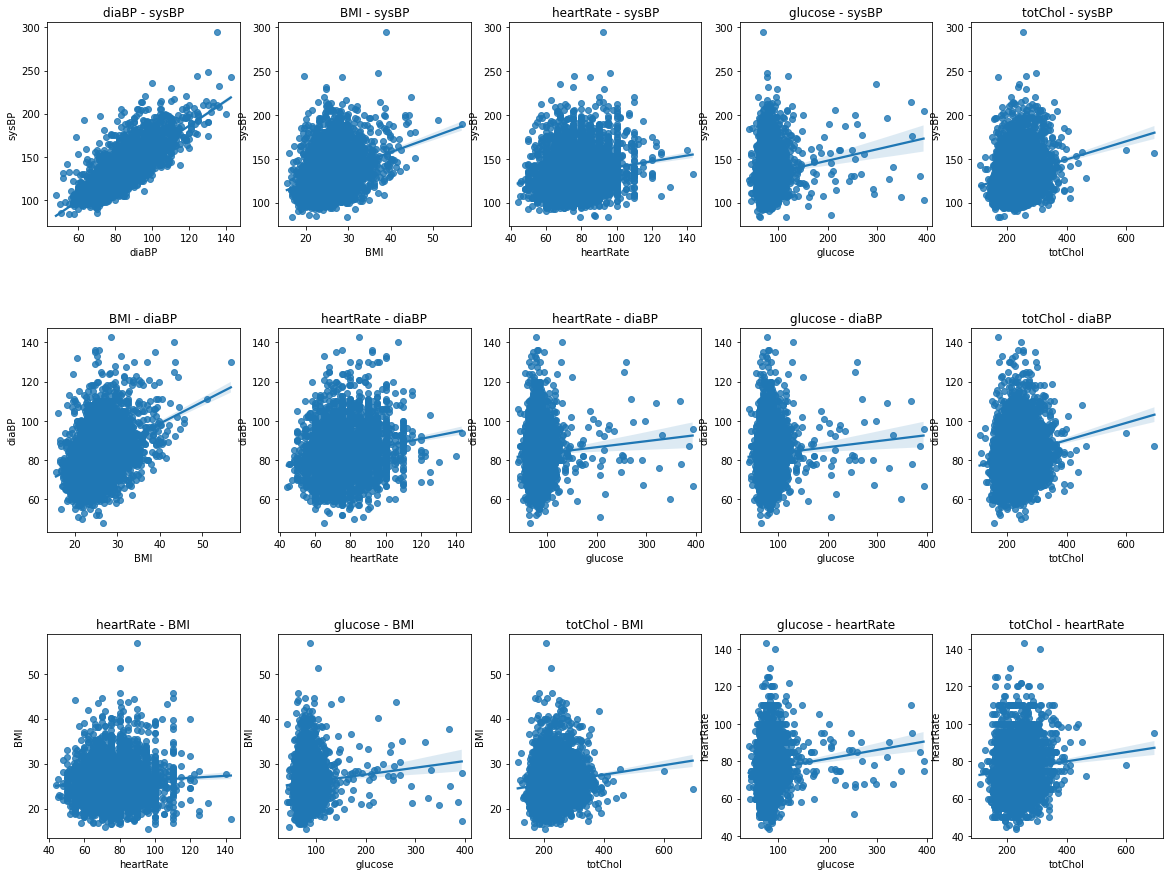

In [127]:
f, ax = plt.subplots(3,5,figsize = (20,15))


#-------------------------------------------
# sysBP - diaBP , BMI, heartRate , glucose , totChol

sns.regplot(x="diaBP", y="sysBP", data=df, ax = ax[0,0])
ax[0,0].set_title('diaBP - sysBP')
sns.regplot(x="BMI", y="sysBP", data=df,ax=ax[0,1])
ax[0,1].set_title('BMI - sysBP')
sns.regplot(x="heartRate", y="sysBP", data=df, ax = ax[0,2])
ax[0,2].set_title('heartRate - sysBP')
sns.regplot(x="glucose", y="sysBP", data=df,ax=ax[0,3])
ax[0,3].set_title('glucose - sysBP')
sns.regplot(x="totChol", y="sysBP", data=df, ax = ax[0,4])
ax[0,4].set_title('totChol - sysBP')

#-------------------------------------------
# diaBP - BMI, heartRate , glucose , totChol

sns.regplot(x="BMI", y="diaBP", data=df, ax = ax[1,0])
ax[1,0].set_title('BMI - diaBP')
sns.regplot(x="heartRate", y="diaBP", data=df,ax=ax[1,1])
ax[1,1].set_title('heartRate - diaBP')
sns.regplot(x="glucose", y="diaBP", data=df, ax = ax[1,2])
ax[1,2].set_title('heartRate - diaBP')
sns.regplot(x="glucose", y="diaBP", data=df,ax=ax[1,3])
ax[1,3].set_title('glucose - diaBP')
sns.regplot(x="totChol", y="diaBP", data=df, ax = ax[1,4])
ax[1,4].set_title('totChol - diaBP')

#-------------------------------------------
# BMI - heartRate , glucose , totChol

sns.regplot(x="heartRate", y="BMI", data=df, ax = ax[2,0])
ax[2,0].set_title('heartRate - BMI')
sns.regplot(x="glucose", y="BMI", data=df,ax=ax[2,1])
ax[2,1].set_title('glucose - BMI')
sns.regplot(x="totChol", y="BMI", data=df, ax = ax[2,2])
ax[2,2].set_title('totChol - BMI')

#-------------------------------------------
# heartRate -  glucose , totChol

sns.regplot(x="glucose", y="heartRate", data=df,ax=ax[2,3])
ax[2,3].set_title('glucose - heartRate')
sns.regplot(x="totChol", y="heartRate", data=df, ax = ax[2,4])
ax[2,4].set_title('totChol - heartRate')


plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

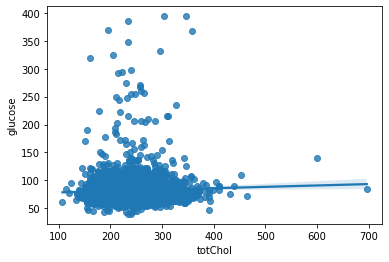

In [128]:
#-------------------------------------------
# glucose - totChol 

sns.regplot(x="totChol", y="glucose", data=df);

---
> **We can say that most of them have a somewhat positive relationship. Only diaBP - sysBP / BMI - diaBP seems to have a fairly high (ideal) positive correlation...**
---

<h1><center>Correlation Between The Features</center></h1>

---
> **Let me briefly explain what correlation analysis is for those who don't know before I go on to interpretation,
The correlation value is between -1 and 1. A value of 0 means that there is no correlation between the variables. As this value moves towards -1, it means 'Negative Perfect Correlation' and as it moves towards +1, it means 'Positive Perfect Correlation'.**
---

In [129]:
# Correlation Analysis
fig = px.imshow(df.corr(), text_auto=True)
fig.update_layout(hovermode="x",autosize=False, width=1000, height=800)
fig.show()

# Interpreting The Heatmap

---

* We have many features and few are well related :)) . The heatmap above is really hard to interpret because there are so many features. When making or training models, I will try to eliminate unnecessary features as it reduces training time and many other advantages.

* From the heatmap above, I see that some features are not very relevant.

**cigsPerDay , currentSmoker - glucose, diabetes, etc... SysBP diaBP can be said to have the highest positive correlation. (0.78 correlation + )**

----

<h1><center>Feature Engineering and Data Cleaning</center></h1>

---
>> **Alright, What is Feature Engineering? Whenever we are given a dataset with features, it is not necessary that all the features will be important. There maybe be many redundant features which should be eliminated. Also we can get or add new features by observing or extracting information from other features.**

In [130]:
# heartRate, prevalentStroke --> Since the correlation values are low, I will drop it from the dataset. 
# p-values were examined.

In [131]:
df.drop(['heartRate','prevalentStroke'], axis = 1 , inplace = True)

In [132]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,195.0,106.0,70.0,26.97,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,250.0,121.0,81.0,28.73,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,245.0,127.5,80.0,25.34,70.0,0
3,0,61,3.0,1,30.0,0.0,1,0,225.0,150.0,95.0,28.58,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,285.0,130.0,84.0,23.10,85.0,0


In [133]:
# Checking for total null values for each variable
df.isnull().sum()

male               0
age                0
education        105
currentSmoker      0
cigsPerDay        29
BPMeds            53
prevalentHyp       0
diabetes           0
totChol           50
sysBP              0
diaBP              0
BMI               19
glucose          388
TenYearCHD         0
dtype: int64

<h1><center>Total Missing Values!</center></h1>

---

| education | cigsPerDay | BPMeds || totChol | BMI | glucose |
| --- | --- | --- || --- | --- | --- |
| 105 | 29 | 53 || 50 | 19 | 388 |


---

---
>> **There are blank observation units in Education, cigsPerDay, totChol, BP Meds, BMI, pulse and glucose variables. I will first examine the missing data randomness and then decide how to fix it.**.
----

### There may be various reasons responsible for why the data is missing. Depending on those reasons, it can be classified into three main types:
---

**1)** Missing completely at random (MCAR) 

**2)** Missing at random (MAR) 

**3)** Missing not at random (MNAR) 

It is important to identify these types of missing data since it can help us make certain assumptions about their distribution and therefore improve our chances of making good estimations.

---


In [134]:
df[df['education'].isnull() & df['TenYearCHD']== 1]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD
33,1,61,NaN,1,5.0,0.0,0,0,175.0,134.0,82.5,18.59,75.0,1
305,1,36,NaN,1,20.0,0.0,1,0,304.0,118.0,90.0,32.63,80.0,1
622,0,64,NaN,0,0.0,0.0,0,0,293.0,116.0,80.0,26.81,87.0,1
916,1,47,NaN,1,25.0,0.0,1,0,236.0,154.0,93.0,24.49,76.0,1
1027,1,63,NaN,1,10.0,0.0,0,0,271.0,131.0,73.5,30.12,107.0,1
1253,1,50,NaN,0,0.0,0.0,0,0,200.0,126.0,88.0,26.73,76.0,1
1286,0,65,NaN,0,0.0,0.0,1,0,220.0,185.5,97.5,38.38,95.0,1
1675,1,44,NaN,1,40.0,0.0,1,0,312.0,157.0,97.0,29.91,74.0,1
2430,1,60,NaN,1,20.0,0.0,0,0,212.0,138.5,87.5,19.54,73.0,1
2669,1,55,NaN,0,0.0,0.0,0,0,222.0,129.0,86.5,33.76,92.0,1


In [135]:
# imputation of education level

In [136]:
df['education'] = np.where(df['education'].isnull() & df['TenYearCHD']== 1, 1, df['education'])

In [137]:
df['education'].isnull().sum()

89

In [138]:
df[df['education'].isnull() & df['TenYearCHD']== 1]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD


In [139]:
df['education'].fillna(2, inplace = True)

In [140]:
df['education'].isnull().sum()

0

----
>> **As observed above, we have assigned Class 1 status to persons with CHD Disease.**

>> **We assigned class 2 status to people without CHD Disease. Because when we examined the education feature before, the probability of having CHD in class 2 status was lower than in other classes.**
----

In [141]:
# Imputing null values
df['cigsPerDay'].fillna(value= round(df['cigsPerDay'].mean()), inplace=True)
df['BPMeds'].fillna(value= float(df['BPMeds'].mode()), inplace=True)
df['totChol'].fillna(value= round(df['totChol'].mean()), inplace=True)
df['BMI'].fillna(value= round(df['BMI'].mean()), inplace=True)
df['glucose'].fillna(value= round(df['glucose'].mean()), inplace=True)
df.isnull().sum()

male             0
age              0
education        0
currentSmoker    0
cigsPerDay       0
BPMeds           0
prevalentHyp     0
diabetes         0
totChol          0
sysBP            0
diaBP            0
BMI              0
glucose          0
TenYearCHD       0
dtype: int64

<h1><center>Model Training</center></h1>

---

In [142]:
X = df.drop(labels='TenYearCHD', axis=1)      #obtain the features from the raw data as X
X.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose
0,1,39,4.0,0,0.0,0.0,0,0,195.0,106.0,70.0,26.97,77.0
1,0,46,2.0,0,0.0,0.0,0,0,250.0,121.0,81.0,28.73,76.0
2,1,48,1.0,1,20.0,0.0,0,0,245.0,127.5,80.0,25.34,70.0
3,0,61,3.0,1,30.0,0.0,1,0,225.0,150.0,95.0,28.58,103.0
4,0,46,3.0,1,23.0,0.0,0,0,285.0,130.0,84.0,23.10,85.0


In [143]:
y = df['TenYearCHD']      #obtain the features from the raw data as X
y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [144]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y,shuffle= True, stratify =y, test_size=0.2, random_state=42)
X_train

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose
1767,0,51,2.0,0,0.0,0.0,0,0,285.0,136.5,86.5,24.81,83.0
2947,0,59,2.0,0,0.0,0.0,0,0,279.0,132.0,88.0,26.48,88.0
888,1,57,1.0,1,10.0,0.0,1,0,206.0,141.0,83.0,27.98,69.0
2026,1,35,2.0,1,3.0,0.0,1,0,282.0,111.0,84.0,29.42,82.0
2696,0,43,1.0,1,15.0,0.0,0,0,315.0,132.5,76.5,31.54,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,1,36,2.0,0,0.0,0.0,0,0,197.0,115.0,65.0,20.42,77.0
3040,1,57,1.0,0,0.0,0.0,1,0,287.0,149.0,86.0,26.33,65.0
2561,0,45,4.0,0,0.0,0.0,0,0,253.0,135.0,85.0,24.35,84.0
3824,0,39,3.0,1,8.0,0.0,0,0,192.0,109.0,61.0,23.36,84.0


In [145]:
scale_minmax = MinMaxScaler()
%time X_train_scaled = scale_minmax.fit_transform(X_train)
X_test_scaled = scale_minmax.transform(X_test)

CPU times: user 4.36 ms, sys: 1.73 ms, total: 6.09 ms
Wall time: 4.86 ms


-----

# Model evaluation

In [146]:
algs = []

algs.append(('SVC', SVC()))
algs.append(('Logistic Regression',LogisticRegression()))
algs.append(('KNN Classifier',KNeighborsClassifier()))
algs.append(('Random Forest Classifier',RandomForestClassifier()))
algs.append(('Decision Tree Classifier',DecisionTreeClassifier()))
algs.append(('Naive bayes',GaussianNB()))
algs

[('SVC', SVC()),
 ('Logistic Regression', LogisticRegression()),
 ('KNN Classifier', KNeighborsClassifier()),
 ('Random Forest Classifier', RandomForestClassifier()),
 ('Decision Tree Classifier', DecisionTreeClassifier()),
 ('Naive bayes', GaussianNB())]

In [147]:
for name, model in algs:

    %time model.fit(X_train, y_train)
    print(name ,'Accuracy Score : ',accuracy_score(y_test, model.predict(X_test)))
    print(name ,'F1 Score : ',f1_score(y_test, model.predict(X_test), average='weighted'))
    print('-----------------------------------------------------------------------')

CPU times: user 289 ms, sys: 6.03 ms, total: 295 ms
Wall time: 295 ms
SVC Accuracy Score :  0.847877358490566
SVC F1 Score :  0.7803109091419449
-----------------------------------------------------------------------
CPU times: user 433 ms, sys: 10.3 ms, total: 443 ms
Wall time: 41.1 ms
Logistic Regression Accuracy Score :  0.8490566037735849
Logistic Regression F1 Score :  0.7852084731321289
-----------------------------------------------------------------------
CPU times: user 42.6 ms, sys: 5.81 ms, total: 48.4 ms
Wall time: 4.75 ms
KNN Classifier Accuracy Score :  0.8301886792452831
KNN Classifier F1 Score :  0.7882379685222578
-----------------------------------------------------------------------
CPU times: user 1.55 s, sys: 29.1 ms, total: 1.58 s
Wall time: 356 ms
Random Forest Classifier Accuracy Score :  0.8408018867924528
Random Forest Classifier F1 Score :  0.7845688050650053
-----------------------------------------------------------------------
CPU times: user 14 ms, sys: 4